In [115]:
#This is basically a machine learning model to predict the weather conditions in seattle based on input values.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


data = pd.read_csv("C:/Users/yahqu/Downloads/seattle-weather.csv")
data.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [116]:
#drop unneccessary colums
data = data.drop("date", axis=1)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [118]:
data = data.dropna()

In [119]:
data = data.replace(to_replace=['fog','drizzle','snow'],value='other')
#data = data[data['weather'] != 'other']
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,other
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [120]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


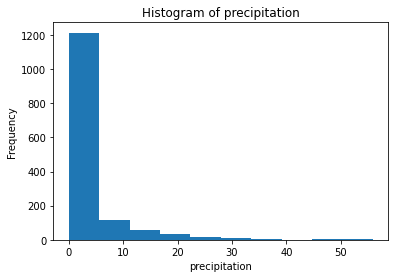

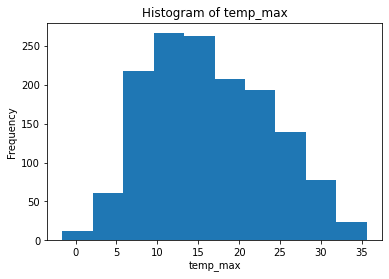

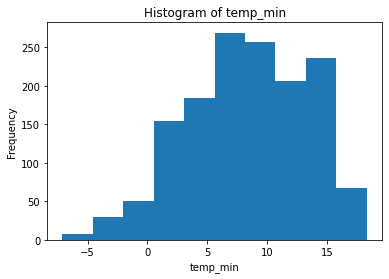

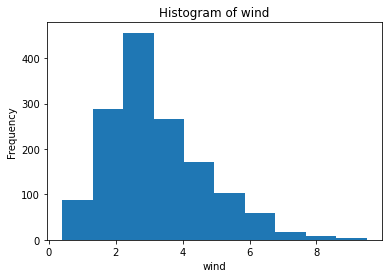

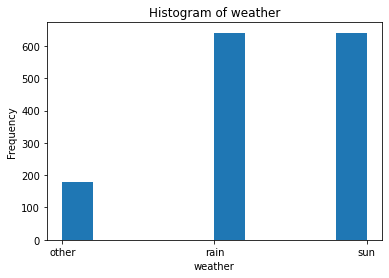

In [121]:
for col in data.columns:
    # Create a histogram for the current column
    plt.hist(data[col], bins=10) # You can adjust the number of bins as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

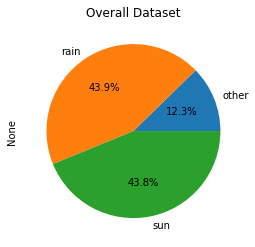

In [122]:
#Plot the original data as a pie chart to visualize the count of weather grouped values. 
groups = data.groupby('weather').size().plot(kind='pie', autopct='%1.1f%%', title = 'Overall Dataset')

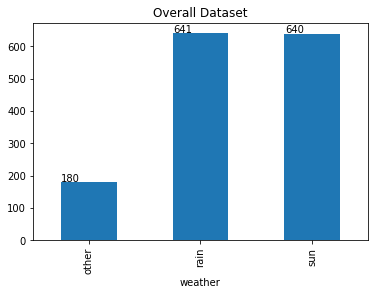

In [123]:
#Plot a bar chart to visualize the count of weather grouped values. 
groups = data.groupby('weather').size().plot(kind='bar', title = 'Overall Dataset')
for p in groups.patches:
    groups.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('weather', axis = 1), data['weather'], test_size= 0.20)

In [125]:
print(X_train.shape)
print(X_test.shape)

(1168, 4)
(293, 4)


In [126]:
model = LogisticRegression(max_iter=1000)

In [127]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [128]:
Predicted_weather = model.predict(X_test)

In [129]:
combine_Xtest_with_predicted_weater = pd.concat([X_test.reset_index(), pd.DataFrame(Predicted_weather, columns = ['Predicted weather'])], axis = 1)

# Models Accuracy

In [130]:
models_accuracy = accuracy_score(Y_test, Predicted_weather)
print("The models accuracy is:", models_accuracy)

The models accuracy is: 0.863481228668942


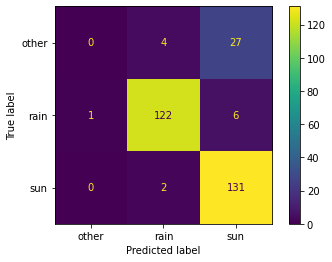

In [131]:
cm = confusion_matrix( Y_test, Predicted_weather, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()